In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the csv file
loan= pd.read_csv("C:/Users/harsh/Downloads/pgdai/lending case study/loan.csv")

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.shape

(39717, 111)

In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
# Checking no of NAN values in dataset
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

Data Cleaning

In [9]:
#Removing column with more than 60% missing value
missing_values = loan.columns[(loan.isnull().sum() / len(loan.index))*100 > 60]
print(missing_values)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [10]:
#Dropping the column having missing values morethan 60%
loan = loan.drop(missing_values, axis= 1)

In [11]:
loan.shape

(39717, 54)

In [12]:
round(loan.isnull().sum()/ len(loan), 4)*100

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [13]:
#Checking remain data info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
# unique values
# We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis.
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [15]:
#removing all cloumns where number of unique values is 1 and dont contain NAN values
# TODO : remove 
for col in loan.columns:
    if len(loan[col].unique()) == 1:
        loan.drop(col,inplace=True,axis=1)

In [16]:
# No of columns after removing 
loan.shape

(39717, 48)

In [17]:
#Checking again if there are any cloumns left with less than 2 unique values
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [18]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [19]:
#removing columns which are not influencing our target variable i.e loan status. 
#here we are assuming that the columns representing customer behavior are not relevant w.r.t our analysis
loan = loan.drop(['delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                  'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens','id', 'member_id',
                                 'url', 'desc', 'zip_code','pub_rec_bankruptcies','earliest_cr_line'
                 ], axis = 1)

In [20]:
#  removing columns 'funded_amnt', 'funded_amnt_inv' since they are processed after lending club analysis so unnecessary wrt to our analysis
loan = loan.drop(['funded_amnt', 'funded_amnt_inv'], axis = 1)

In [21]:
loan.shape

(39717, 17)

In [22]:
#  Removing rows having loan status as current since they could be fully paid or default in future and are undetermined now
loan = loan[loan['loan_status'] != 'Current']

In [23]:
# Shape after removing "Current" loan status
loan.shape

(38577, 17)

In [24]:
loan.isnull().sum()*100/loan.shape[0]

loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.185033
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
title                  0.028514
addr_state             0.000000
dti                    0.000000
dtype: float64

In [25]:
loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2386
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                    11
addr_state                0
dti                       0
dtype: int64

In [26]:
loan['title'].describe()

count                  38566
unique                 19297
top       Debt Consolidation
freq                    2090
Name: title, dtype: object

Can impute title column with mode value since it has a categorical values. Thus 'Debt Consolidation' can be used to impute NAN values

In [27]:
loan['emp_title'].describe() 

count       36191
unique      28027
top       US Army
freq          131
Name: emp_title, dtype: object

Can impute emp_title column with mode since it has a categorical values. Thus 'US ARMY' can be used to impute NAN values.


In [28]:
loan['emp_length'].describe() 

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

Can impute emp_length column with mode since it has a categorical values. Thus '10+ years' can be used to impute NAN values.

In [29]:
# Checking max no of null values in rows.
loan.isnull().sum(axis = 1).describe()

count    38577.000000
mean         0.088913
std          0.363139
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
dtype: float64

In [30]:
# Removing rows where title, employee title, employee length are NAN.  
loan = loan[~loan['title'].isnull()]
loan = loan[~loan['emp_title'].isnull()]
loan = loan[~loan['emp_length'].isnull()]

In [31]:
#dropping the rows where home ownership is none.
loan = loan[loan['home_ownership'] != 'NONE']

In [32]:
loan.shape

(36126, 17)

In [33]:
loan.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
dtype: int64

# Handling Incorrect Data type

In [34]:
loan.dtypes

loan_amnt                int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
title                   object
addr_state              object
dti                    float64
dtype: object

In [35]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: x[:-1])
loan['int_rate'] = loan['int_rate'].astype(float)

In [36]:
loan['int_rate'].describe()

count    36126.000000
mean        11.968287
std          3.684487
min          5.420000
25%          9.010000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

Converting loan_amnt, installment, int_rate, annual_inc, dti, term columns to numeric

In [37]:
numeric_columns = ['loan_amnt','installment','int_rate','annual_inc','dti']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [38]:
loan['term'] = loan['term'].apply(lambda x: x.split(" ")[-2])

Converting issue date to date time

In [39]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

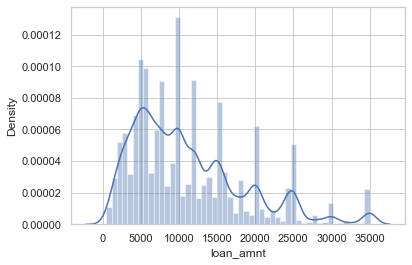

In [40]:
#checking distrbution of loan amount
sns.distplot(loan['loan_amnt'])
plt.show()

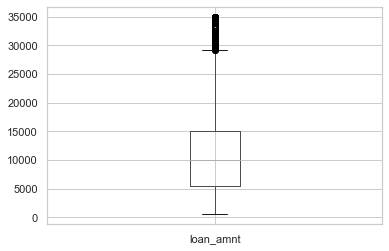

In [41]:
#checking if there are any outliers in the columns containing numerical values
loan.boxplot(column=['loan_amnt']);

<AxesSubplot:>

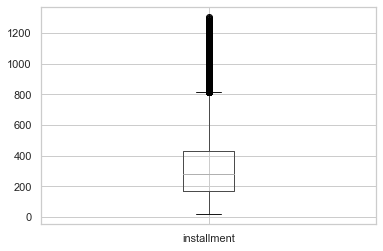

In [43]:
loan.boxplot(column=['installment'])

<AxesSubplot:>

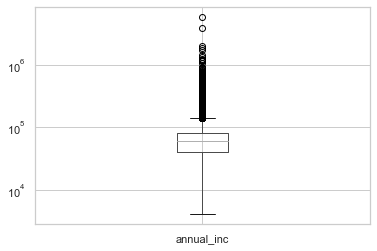

In [44]:
plt.yscale("log")
loan.boxplot('annual_inc')

In [45]:
loan.describe()

,loan_amnt,int_rate,installment,annual_inc,dti
count,36126.000000,36126.000000,36126.000000,3.612600e+04,36126.000000
mean,11103.108564,11.968287,323.819172,6.903946e+04,13.354554
std,7313.015935,3.684487,207.257122,6.462890e+04,6.646555
min,500.000000,5.420000,16.080000,4.000000e+03,0.000000
25%,5500.000000,9.010000,167.590000,4.100000e+04,8.260000
50%,10000.000000,11.830000,280.260000,6.000000e+04,13.460000
75%,15000.000000,14.420000,426.470000,8.200000e+04,18.610000
max,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000


In [46]:
loan['annual_inc'].quantile(0.995)

300000.0

In [47]:
loan=loan[loan['annual_inc']<loan['annual_inc'].quantile(0.995)]

In [48]:
loan['annual_inc'].describe()

count     35930.000000
mean      66459.743516
std       36734.492563
min        4000.000000
25%       41000.000000
50%       59004.000000
75%       81996.000000
max      294000.000000
Name: annual_inc, dtype: float64

In [49]:
#removing rows from "installment" after 99.5 percentile
loan = loan[loan["installment"] < loan["installment"].quantile(0.995)]
loan["installment"].describe()

count    35749.000000
mean       318.498016
std        197.986741
min         16.080000
25%        167.080000
50%        278.490000
75%        421.590000
max       1035.280000
Name: installment, dtype: float64

In [50]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti'],
      dtype='object')

In [51]:
loan.shape

(35749, 17)

In [52]:
loan['purpose'].value_counts()

debt_consolidation    17048
credit_card            4675
other                  3550
home_improvement       2604
major_purchase         1988
car                    1411
small_business         1384
wedding                 883
medical                 628
moving                  529
vacation                338
house                   329
educational             296
renewable_energy         86
Name: purpose, dtype: int64

In [53]:
loan['emp_length'].dtype

dtype('O')

In [54]:
loan['emp_length'] = loan['emp_length'].apply(lambda x: '0' if x == '< 1 year' else ( '10' if x == '10+ years' else x[0] ))

In [55]:
loan['emp_length'] = loan['emp_length'].astype(int)

In [56]:
loan['emp_length'].describe()

count    35749.000000
mean         4.953761
std          3.538557
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

# Data Analysis

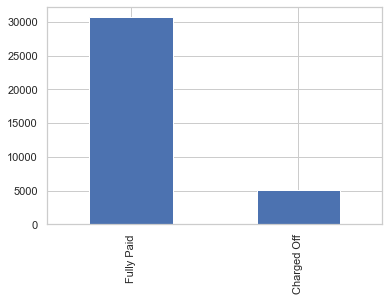

In [57]:
loan['loan_status'].value_counts().plot.bar()
plt.show()

From this above information
1. More than 30000 people have fully paid
2. 5000 people are Charged Off

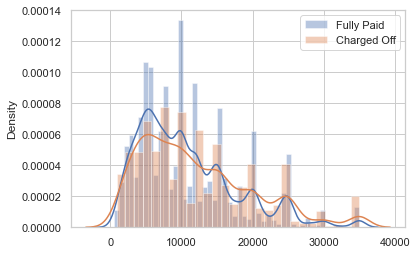

In [58]:
sns.distplot(x=loan[loan["loan_status"]=="Fully Paid"]["loan_amnt"], label="Fully Paid")
sns.distplot(x=loan[loan["loan_status"]=="Charged Off"]["loan_amnt"], label="Charged Off")
plt.legend()
plt.show()

From this above information
1. More people who borrow loan with amount lower around 13000 are able to fully pay their loan.
2. People borrowing more amount tens to default more.

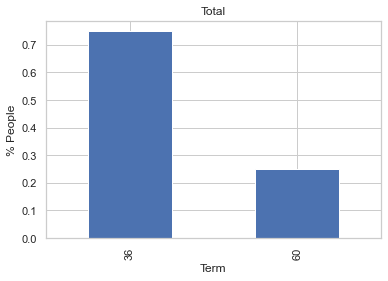

In [59]:
loan['term'].value_counts(1).plot.bar(xlabel = 'Term', title = 'Total', ylabel = '% People')
plt.show()

<AxesSubplot:xlabel='term,loan_status'>

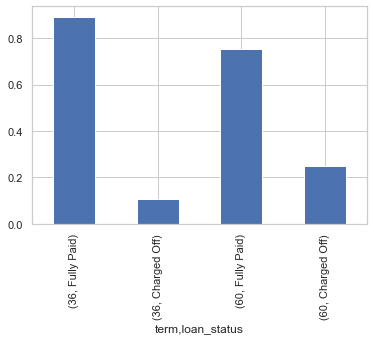

In [60]:
loan.groupby('term')['loan_status'].value_counts(1).plot.bar()

From above 2 plots, we get information
1. More than 70% people of the total applied for 36 months loan period
2. More than 24% of the people who took loan for 60 months of term, defaulted their loan.

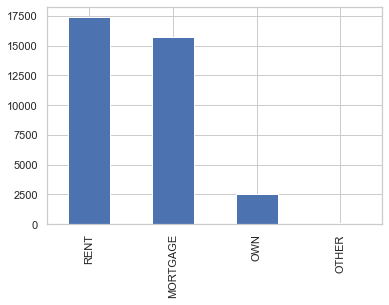

In [61]:
loan['home_ownership'].value_counts().plot.bar()
plt.show()

In [62]:
# TODO: Analysis wrt to home ownership
# loan.groupby('home_ownership')['loan_status'].value_counts(1)
# plt.show()

# loan[loan["loan_status"]=="Charged Off"]['home_ownership'].value_counts(1).plot.bar()
# plt.show()


<!-- Less than 10% of the people who default their loans have their own house. More than 50% of the people who default their loans are living on rent.Thus they have higher chances of defaulting their loans. -->

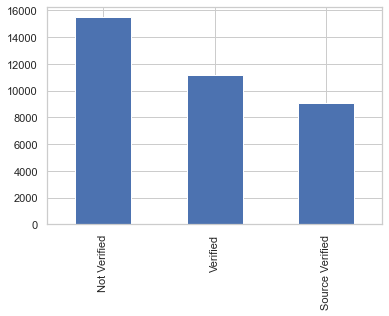

In [64]:
loan['verification_status'].value_counts().plot.bar()
plt.show()

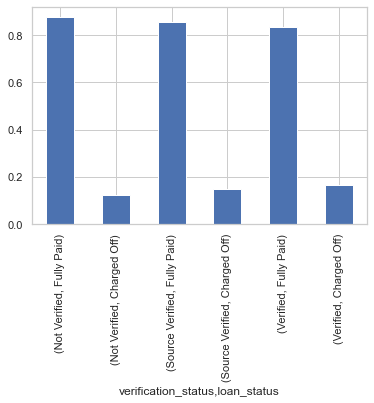

In [65]:
loan.groupby('verification_status')['loan_status'].value_counts(1).plot.bar()
plt.show()

From this above information
1. Most people were not verified.
2. Max people who defaulted their loan were verified (around 16% of the verified people).

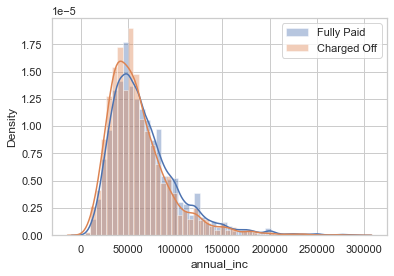

In [66]:
sns.distplot(loan[loan["loan_status"]=="Fully Paid"]['annual_inc'], label="Fully Paid")
sns.distplot(loan[loan["loan_status"]=="Charged Off"]['annual_inc'], label="Charged Off")
plt.legend()
plt.show()

From this above information
1. People having lower annual income (less than around 60000) have defaulted their loan more and the default rate decreases at high annual income level.

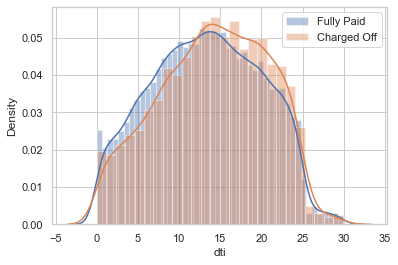

In [67]:
sns.distplot(loan[loan["loan_status"]=="Fully Paid"]['dti'], label="Fully Paid")
sns.distplot(loan[loan["loan_status"]=="Charged Off"]['dti'], label="Charged Off")
plt.legend()
plt.show()

From this above information
1. People having lower debt to income ratio tend to fully pay their loan and vice versa.

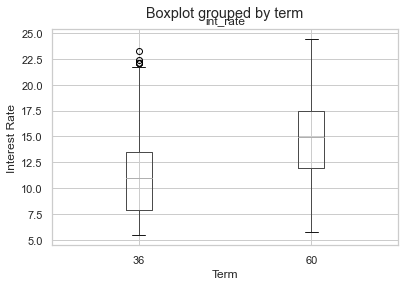

In [68]:
tr = loan.boxplot(column="int_rate",by = "term")
tr.set(xlabel='Term', ylabel='Interest Rate')
plt.show()

From this above information
1. On an avg, 36 month term loan has lower interest rates as compared to 60 month term loan.

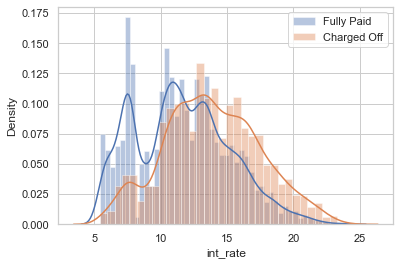

In [69]:
sns.distplot(loan[loan["loan_status"]=="Fully Paid"]['int_rate'], label="Fully Paid")
sns.distplot(loan[loan["loan_status"]=="Charged Off"]['int_rate'], label="Charged Off")
plt.legend()
plt.show()

From this above information
1. More no of defaulters for the loan having higher rate of interest (around 12% interest rate)

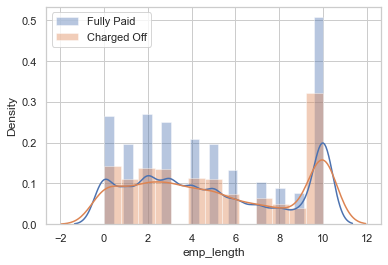

In [70]:
sns.distplot(loan[loan["loan_status"]=="Fully Paid"]['emp_length'], label="Fully Paid")
sns.distplot(loan[loan["loan_status"]=="Charged Off"]['emp_length'], label="Charged Off")
plt.legend()
plt.show()

Not much insightful

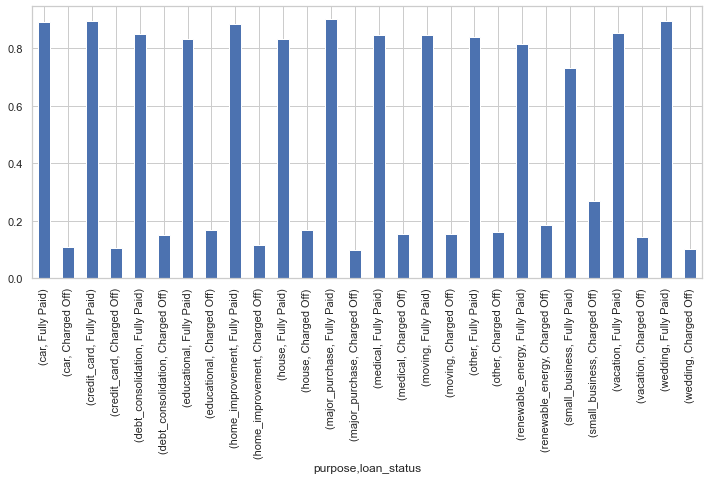

In [71]:
# Any better way to do this?
plt.figure(figsize=(12,5))
loan.groupby('purpose')['loan_status'].value_counts(1).plot.bar()
plt.show()

From this above information
1. People who take loan for small business related purpose are most defaulters, this might be due to the competition and losses while opening and running small business

In [72]:
# TODO analysis wrt to grade, subgrade, date-time

# Loan Status vs Loan Amount of charged off loans

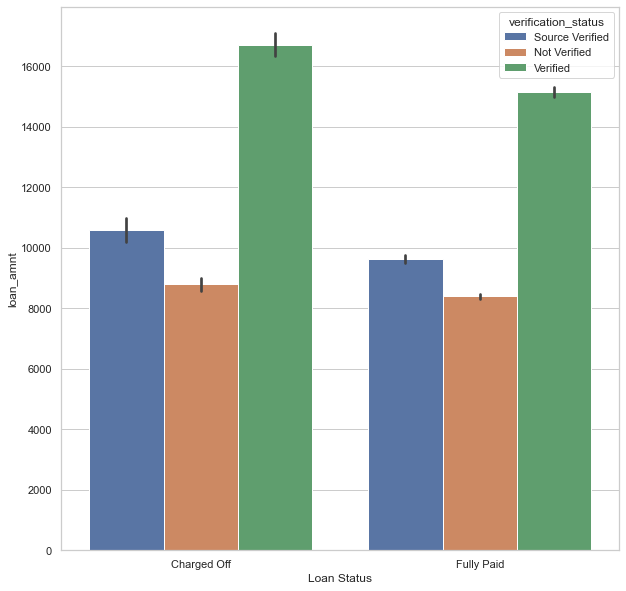

In [73]:
plt.figure(figsize=(10,10))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loan)
plt.xlabel("Loan Status")
plt.show()